## Image Classification with the MNIST Dataset

This project was created to study *deep learning* and their concepts. The principal ideia is to build a simple neural network to perform image classification on **[MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/)**. The **[Keras API](https://keras.io/)** is used to load the MNIST dataset and prepare it for training.

> MNIST is an acronym that stands for the *Modified National Institute of Standards and Technology*.

First of all, its necessary to know the difference between *traditional programming* and *machine learning*.

In traditional programming, the programmer is able to articulate rules and conditions in their code that their program can then use to act in the correct way. This approach continues to work exceptionally well for a huge variety of problems.

Image classification, which asks a program to correctly classify an image it has never seen before into its correct class, is near impossible to solve with traditional programming techniques. Because of this, *deep learning* became a better solution to this. By training a deep neural network with sufficient data, and providing the network with feedback on its performance via training, the network can identify, though a huge amount of iteration, its own set of conditions by which it can act in the correct way.

*Hello World in Deep Learning* - Today, doing image classification with MNIST has become a king of "Hello World" for deep learning. Its a collection of 70000 grayscale images of handwriteen digits from 0 to 9.

### Training and Validation Data and Labels

When working with images for deep learning, we need both the images themselves, usually denoted as `X`, and also, correct *labels* for these images, usually denoted as `Y`. Furthermore, we need `X` and `Y` values both for *training* the model, and then, a separate set of `X` and `Y` values for *validating* the performance of the model after it has been trained.

1. `x_train`: Images used for training the neural network.
2. `y_train`: Correct labels for the `x_train` images, used to evaluate the models predictions during training.
3. `x_valid`: Images set aside for validating the performance of the model after it has been trained.
4. `y_valid`: Correct labels for the `x_valid` images, used to evaluate the models predictions after it has been trained.

### Loading the Data Into Memory with Keras

As previously mentioned, we will use **Keras framework** to load MNIST dataset and associate to variables.

First, we need to import the *MNIST module* like this:

In [ ]:
from tensorflow.keras.datasets import mnist

After import the `mnist` module, we can load the MNIST data and assign to variables.

In [ ]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In MNIST dataset, there are 70,000 grayscale images of handwriteen digits. But, we can see that Keras has partitioned 60,000 of these images for training, and 10,000 for validation.

In [ ]:
x_train.shape

In [ ]:
x_train.shape

Each number is represented by a matrix with *28 columns and 28 rows* with unsigned 8-bit integer values between 0 and 255, the values corresponding with a pixel's grayscale value where `0` is black, `255` is white, and all other values are in between:

In [ ]:
x_train.d_type

In [ ]:
x_train.min()

In [ ]:
x_train.max()

In [ ]:
x_train[0]

Using **[Matplotlib](https://matplotlib.org/)**, we can render one of these grayscale images in our dataset:

In [ ]:
import matplotlib.pyplot as plt # importing matplotlib module

image = x_train[0] # associating the first number in a variable
plt.imshow(image, cmap='gray') # using plt.imshow function to show a number in gray scale

The answer is in the `y_train` data, which contains correct labels for the data.

In [ ]:
y_train[0]

Another example:

In [ ]:
another_image = x_train[10]
plt.imshow(another_image, cmap='gray')

### Preparing the Data for Training

In deep learning, it is commom that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:

1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

### Flattenning the Image Data

Though it is possible for a deep learning model to accept a 2-dimensional image, we are going to simplify things to start and reshape each image into a single array of `784` (28 * 28) continuous pixels. This is also called **flattening the image**.

In [ ]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

### Normalizing the Image Data

**Deep learning models are better at dealing with floating point numbers between 0 and 1**. Converting integer values to floating point values between 0 and 1 is called **[normalization](https://developers.google.com/machine-learning/glossary#normalization)**, and a simple approach we will take here to normalize the data will be to divide all the pixel values by 255:

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

Now, all the values in `x_train` and `x_valid` are between `0.0` and `1.0`.

### Categorical Encoding

In this image classification problem, we want it to select the correct category, and understand that if we have an image of the number 5, that guessing 4 is just as bad as guessing 9.

The labels for the images are integers between 0 and 9. Because these values represent a numerical range, the model might try to draw some conclusions about its performance based on how close to the correct numerical category it guesses.

To resolve this, we will do something to our data called **categorical encoding**. This kind of transformation modifies the data so that each value is a collection of all possible categories, with the actual category that this particular value is set as true.

**Keras** provides a utility to [categorically encode values](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), and here we use it perform categorical encoding for both the training and validation labels:

In [ ]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

### Creating the Model

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several *layers* and will be comprised of 3 main parts:

1. An input layer, which will receive data in some expected format
2. Several [hidden layers](https://developers.google.com/machine-learning/glossary#hidden-layer), each comprised of many *neurons*. Each [neuron](https://developers.google.com/machine-learning/glossary#neuron) will have the ability to affect the network's guess with its *weights*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will depict the network's guess for a given image

### Instantiating the Model

To begin, we will use Keras's [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Creating the Input Layer

Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class.

In [ ]:
from tensorflow.keras.layers import Dense

The `units` argument specifies the number of neurons in the layer. Choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset.

The `activation` argument specifies the activation function to use. If you don't specify anything, no activation is applied.

The `input_shape` value specifies the shape of the incoming data which in our situation is a 1D array of 784 values:

In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### Creating the Hidden Layer

Now we will add an additional densely connected layer. These layers give the network more parameters to contribute towards its guesses, and therefore, more subtle opportunities for accurate learning:

In [ ]:
model.add(Dense(units = 512, activation='relu'))

### Creating the Output Layer

Finally, we will add an output layer. This layer uses the activation function `softmax` which will result in each of the layer's values being a probability between 0 and 1 and will result in all the outputs of the layer adding to 1. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gives the model's guess (a probability) that the image belongs to that specific class:

In [ ]:
model.add(Dense(units = 10, activation='softmax'))

### Summarizing the Model

Keras provides the model instance method [summary](https://www.tensorflow.org/api_docs/python/tf/summary) which will print a readable summary of a model:

In [ ]:
model.summary()

Note the number of trainable parameters. Each of these can be adjusted during training and will contribute towards the trained model's guesses.

### Training the Model

Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put this latter way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

When fitting (training) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

In [ ]:
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

### Observing Accuracy

The model did quite well! The accuracy quickly reached close to 100%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.

The next step would be to use this model to classify new not-yet-seen handwritten images. This is called [inference](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/).

### Summary

It's worth taking a moment to appreciate what we've done here. Historically, the expert systems that were built to do this kind of task were extremely complicated, and people spent their careers building them (check out the references on the [official MNIST page](http://yann.lecun.com/exdb/mnist/) and the years milestones were reached).

MNIST is not only useful for its historical influence on Computer Vision, but it's also a great [benchmark](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf) and debugging tool. Having trouble getting a fancy new machine learning architecture working? Check it against MNIST. If it can't learn on this dataset, chances are it won't learn on more complicated images and datasets.

### Clear the Memory

Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

### ☆ Bonus Exercise ☆

Ultimately, each neuron is trying to fit a line to some data. Below, we have some datapoints and a randomly drawn line using the equation [$y = mx + b$](https://www.mathsisfun.com/equation_of_line.html).

We have to use `polyfit` function to assign `m` and the `b` in order to find the lowest possible loss.

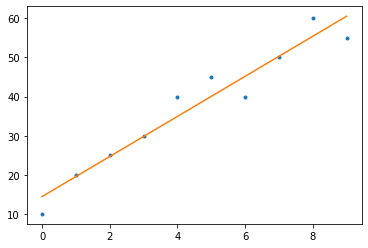

Loss: 14.87878787878788


In [1]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])

mean_squared_error = polyfit(x, y, 1)
b = mean_squared_error[0]
m = mean_squared_error[1]

y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat) ** 2) / len(x))

In [2]:
data = [(1, 3), (2, 5)]
m = -1
b = 5

def get_rmse(data: list, m: int, b: int):
  """Calculates Mean Square Error."""
  n = len(data)
  squared_error = 0
  for x, y in data:
    y_hat = m * x + b
    squared_error += (y - y_hat) ** 2
  mse = squared_error / n

  return mse ** .5

print(get_rmse(data, m, b))

1.5811388300841898
